In [26]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import glob
import numpy as np
import sys
sys.path.append('../creme/')
import utils
import custom_model
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
pdf_dir = utils.make_dir('pdfs/sufficiency_of_greedy_search_tiles/')

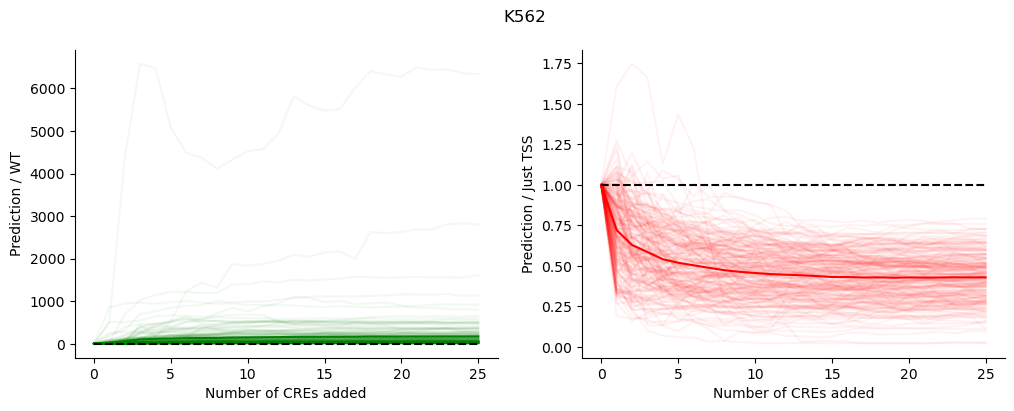

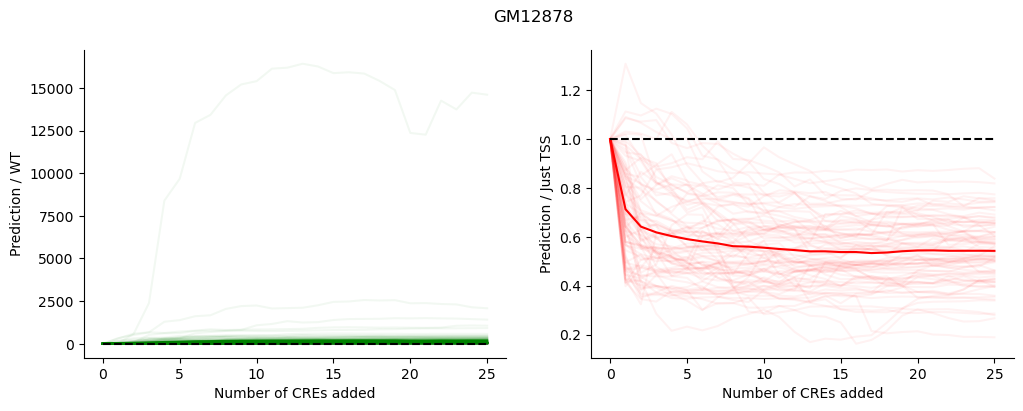

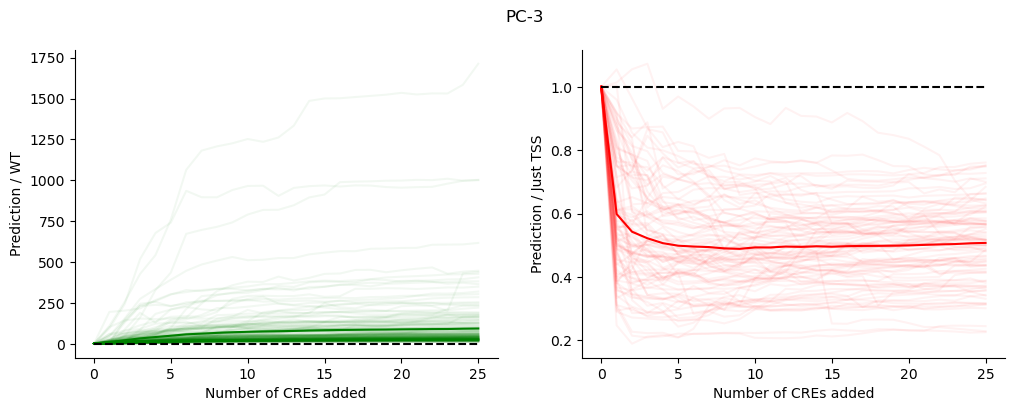

In [32]:
for cell_line in ['K562', 'GM12878', 'PC-3']:
    fig, axes = plt.subplots(1, 2, figsize=[12, 4])
    for g, greedy_search_type in enumerate(['min', 'max']):
        ax = axes[g]
        result_dir = f'../results/higher_order_test_{greedy_search_type}/enformer/sufficiency/{cell_line}/'
        context_df = pd.read_csv(f'../results/summary_csvs/enformer/{cell_line}_selected_contexts.csv')
        if greedy_search_type == 'min':
            norm = 'WT'
            color = 'g'
            element_type = 'Enhancers'
            context_df = context_df[context_df['context'] == 'enhancing']
        elif greedy_search_type == 'max':
            norm = 'Just TSS'
            color = 'r'
            element_type = 'Silencers'
            context_df = context_df[context_df['context'] == 'silencing']
        traces = []
        for i, row in context_df.iterrows():
            
            seq_id = row['path'].split('/')[-1].split('.')[0]
            result_path = f'{result_dir}/{seq_id}.pickle'
            res = utils.read_pickle(result_path)
            res_greedy = utils.read_pickle(result_path.replace('sufficiency', ''))
            wt = res_greedy[0]['initial_pred']
            res['predictions'].insert(0, res['only_tss_preds'])
            preds = np.array(res['predictions'])
            if element_type == 'Enhancers':
                trace = preds / wt
                
            else:
                trace = preds / res['only_tss_preds']

            traces.append(trace)
            ax.plot(trace, alpha=0.05, c=color)
        ax.set_xlabel('Number of CREs added')
        ax.set_ylabel(f'Prediction / {norm}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.plot(np.array(traces).mean(axis=0), c=color)
        ax.hlines(1, 0, 25, color='k', linestyles='--')
    plt.suptitle(cell_line)
    fig.savefig(f'{pdf_dir}/{cell_line}.pdf')